In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import warnings


warnings.filterwarnings("ignore")      #忽略掉烦人的warning

%matplotlib inline

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

def cv_show(name,img):       #定义显示图片的函数（可能会卡死）
    cv2.imshow(name,img)
    cv2.waitKey(0)           #等待时间 毫秒级 0表示任意键终止
    cv2.destroyAllWindows()
    
def inversePic(img):         #显示正常色彩的颜色（img read的色彩是BGR格式，而plt输出的是RGB色彩，需要格式转换）
    b,g,r = cv2.split(img)   #分割色彩空间
    img = cv2.merge([r,g,b]) #merge RGB
    return img
    
def show(img):               #定义显示图片的函数（在命令行下方输出图片）
    if(len(img.shape) == 3):     #彩色图像
        img = inversePic(img)
        plt.imshow(img)          #多采用plt方式输出图片 一般的cv_imshow会出现卡死的状况
    else:                        #灰度图像
        plt.imshow(img,cmap = "gray")
    
def showList(imgs,titles):                  #显示多张照片
    plt.figure(figsize=(16,16))      #设置每张图片的大小
    y = math.ceil(len(imgs)**0.5)    #设置列数
    x = len(imgs) / y + 1            #设置行数
    for i in range(len(imgs)):               #对img数组中的元素进行遍历
        plt.subplot(x,y,(i+1))       #设置位置 x行y列顺序第i+1个
        if(len(imgs[i].shape) == 3):     #如果是三通道数的图->需要特殊处理
            res = inversePic(imgs[i])    #将图像处理成RGB格式
            plt.imshow(res)
        else:                           #如果是单通道数的图->不需要特殊处理 直接输出
            plt.imshow(imgs[i],cmap = "gray")
        if(len(titles) == len(imgs)):
                plt.title(titles[i])
    plt.show()

# 图像的基础
**在没有转换成RGB格式前**<br>
- blue = img[ :, :, 0]
- green = img[ :, :, 1]
- red = img[ :, :, 2]<br>
只保留r通道 ： 将blue和green置为0

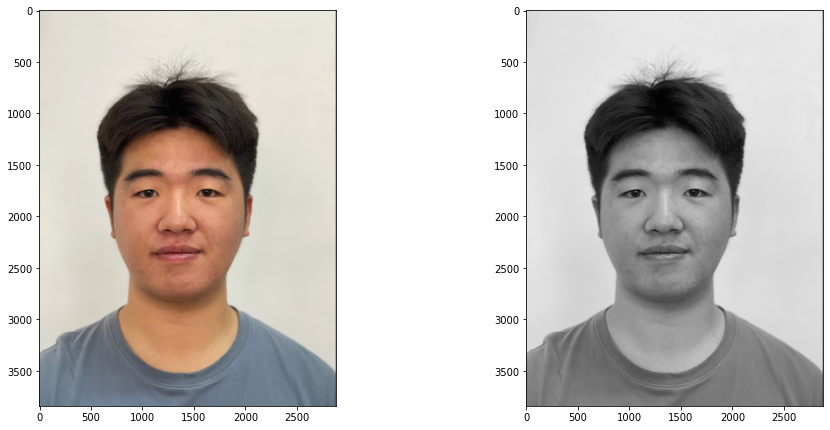

In [10]:
img = cv2.imread('lxc.JPG')  #读取图片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #转成灰度图
imgs = [img,img_grey]
#plt.imshow(img_grey,cmap = "gray")                 #由于plt输出的是RGB格式，输出灰度图会偏绿，要加一个cmap = "gray"
showList(imgs,[""])

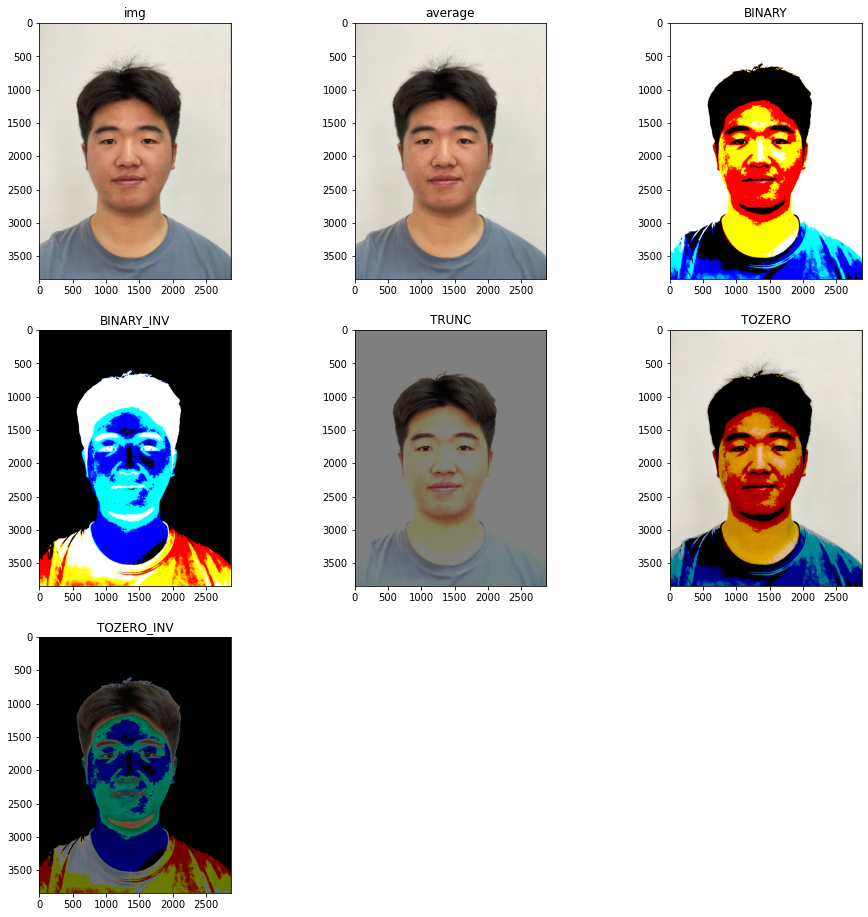

In [11]:
#针对RGB彩色图
ret,img_binary     =  cv2.threshold(img,127,255,cv2.THRESH_BINARY)       #超过阈值的部分去maxval最大值 否则取0
ret,img_binary_inv =  cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)   #THRESH_BINARY的反转
ret,img_trunc      =  cv2.threshold(img,127,255,cv2.THRESH_TRUNC)        #大于阈值部分设为阈值，否则不变
ret,img_tozero     =  cv2.threshold(img,127,255,cv2.THRESH_TOZERO)       #大于阈值部分不改变，否则取0
ret,img_tozero_inv =  cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)   #THRESH_TOZERO的反转
imgs   = [img,img_blur,img_binary,img_binary_inv,img_trunc,img_tozero,img_tozero_inv]
titles = ['img','average','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
showList(imgs,titles)

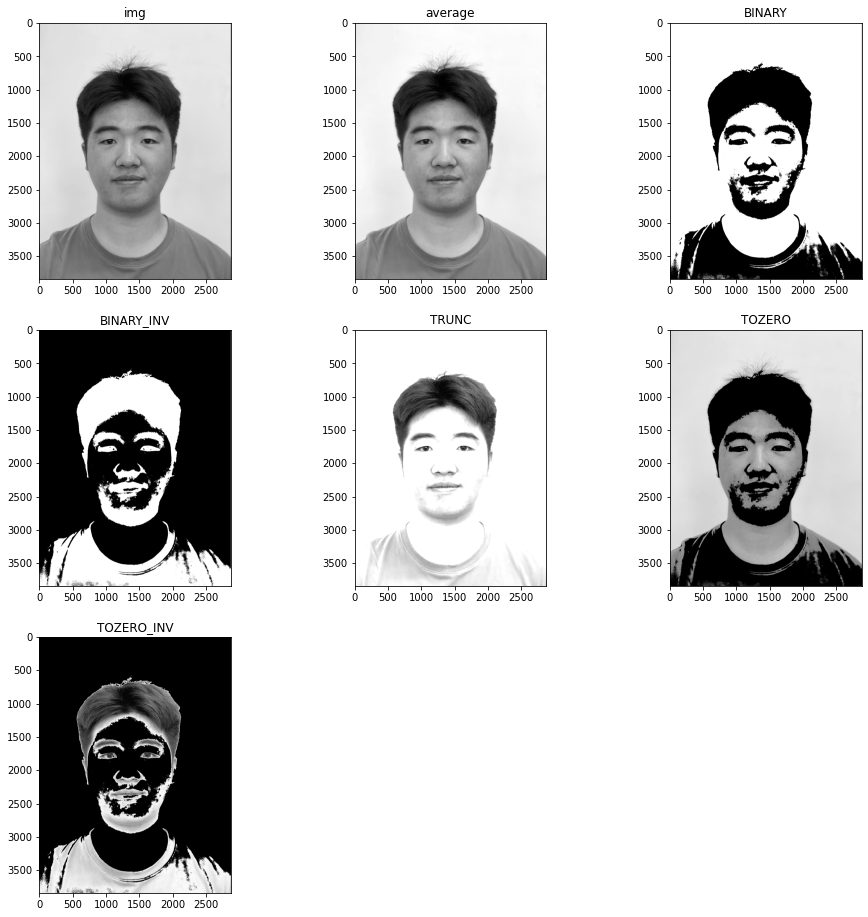

In [12]:
#针对灰度图
img_blur = cv2.blur(img_grey,(10,10))        #在3*3的空间内卷积取平均值
ret,img_binary     =  cv2.threshold(img_grey,127,255,cv2.THRESH_BINARY)       #超过阈值的部分取maxval最大值 否则取0
ret,img_binary_inv =  cv2.threshold(img_grey,127,255,cv2.THRESH_BINARY_INV)   #THRESH_BINARY的反转
ret,img_trunc      =  cv2.threshold(img_grey,127,255,cv2.THRESH_TRUNC)        #大于阈值部分设为阈值，否则不变
ret,img_tozero     =  cv2.threshold(img_grey,127,255,cv2.THRESH_TOZERO)       #大于阈值部分不改变，否则取0
ret,img_tozero_inv =  cv2.threshold(img_grey,127,255,cv2.THRESH_TOZERO_INV)   #THRESH_TOZERO的反转
imgs   = [img_grey,img_blur,img_binary,img_binary_inv,img_trunc,img_tozero,img_tozero_inv]
titles = ['img','average','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
showList(imgs,titles)

# 边界填充
## 边界填充

matplotlib 中进行边界填充

```python
cv2.copyMakeBorder( img, top_size , bottom_size , left_size , right_size , borderType)
```


其中borderType (格式为 BORDER_xxx)：xxx为

- ORIGINAL
- REPLICATE 复制法
- REFLECT 反射法：对感兴趣的图像中的像素在两边进行复制      fedcba｜abcdefgh｜hgfedcb
- REFLECT_101 反射法：以最边缘像素为轴       gfedcb | abcdefgh | gfedcba
- WRAP 外包装法    cdefgh｜abcdefgh｜abcdefg
- CONSTANT 常量法：常数值填充  并要设定value值（0 为 黑框）

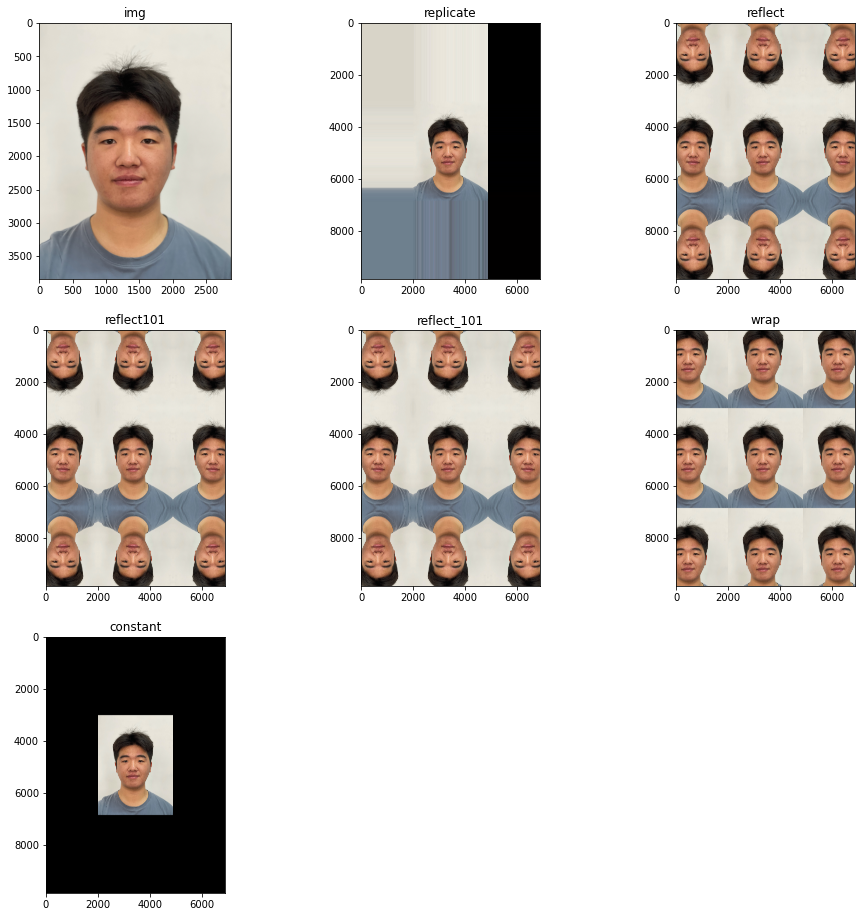

In [13]:
#边界填充
img = cv2.imread('lxc.JPG')
top_size,bottom_size,left_size,right_size = (3000,3000,2000,2000)
replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_REFLECT101)
reflect_101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_CONSTANT)
imgs = [img,replicate,reflect,reflect101,reflect_101,wrap,constant]
titles = ['img','replicate','reflect','reflect101','reflect_101','wrap','constant']
showList(imgs,titles)

# 图像融合 数值计算

图像+数值： 矩阵内的所有数值+该数值<br>
图像+图像：所有图像内的数值相加，越界对256进位<br>
add(图像，图像)：相加，最大值255<br>
<b> 两个图像的shape值必须相同 </b>
```
cv2.addWeighted(img1 , weight1 , img2 , weight2 , weight3);	# weight1 2表示权重 3表示提亮多少
```

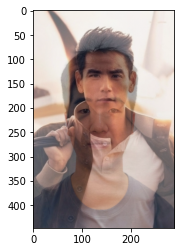

In [14]:
#图像融合 数值计算
img = cv2.imread('lxc.JPG')
img_pyy = cv2.imread('pyy.jpeg')                   #读取pyy照片
x,y = img_pyy.shape[0:2]                           #取出宽和高
img = cv2.resize(img,(y,x))                        #将img图片resize
img_add = cv2.addWeighted(img,0.4,img_pyy,0.6,0)   #将两个图片融合
show(img_add)

# 图像平滑处理
- 均值滤波
- 方框滤波
- 高斯滤波
- 中值滤波

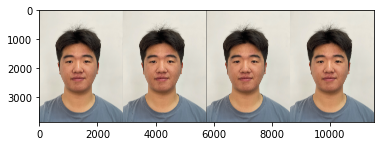

In [15]:
img = cv2.imread('lxc.jpg')
img_blur = cv2.blur(img,(10,10))                         #在10*10的空间内取平均值
img_box = cv2.boxFilter(img,-1,(3,3),normalize = True)   #-1表示颜色通道数一致 normalize归一化：true和blur一致 false表示加起来不除9，超过会取255
img_gaussian = cv2.GaussianBlur(img,(5,5),1)             #高斯内核大小5*5   1可以换为0～1之间的小数 代表权重
img_median = cv2.medianBlur(img,5)                       #模板尺寸大小5*5
#imgs = [img,img_blur,img_box,img_gaussian,img_median]
#titles = ['original','blur','box','gaussian','median']
#showList(imgs,titles)
res = np.hstack((img_blur,img_box,img_gaussian,img_median))
show(res)

一般为二值的图片
# 形态学 - 腐蚀操作
相当于将白色变瘦
# 形态学 - 膨胀操作
相当于将白色变胖
# 形态学 - 开运算
先腐蚀再膨胀
# 形态学 - 闭运算
先膨胀再腐蚀
# 形态学 - 梯度运算
膨胀-腐蚀
# 形态学 - 礼帽
原始输入-开运算结果
# 形态学 - 黑帽
闭运算-原始输入

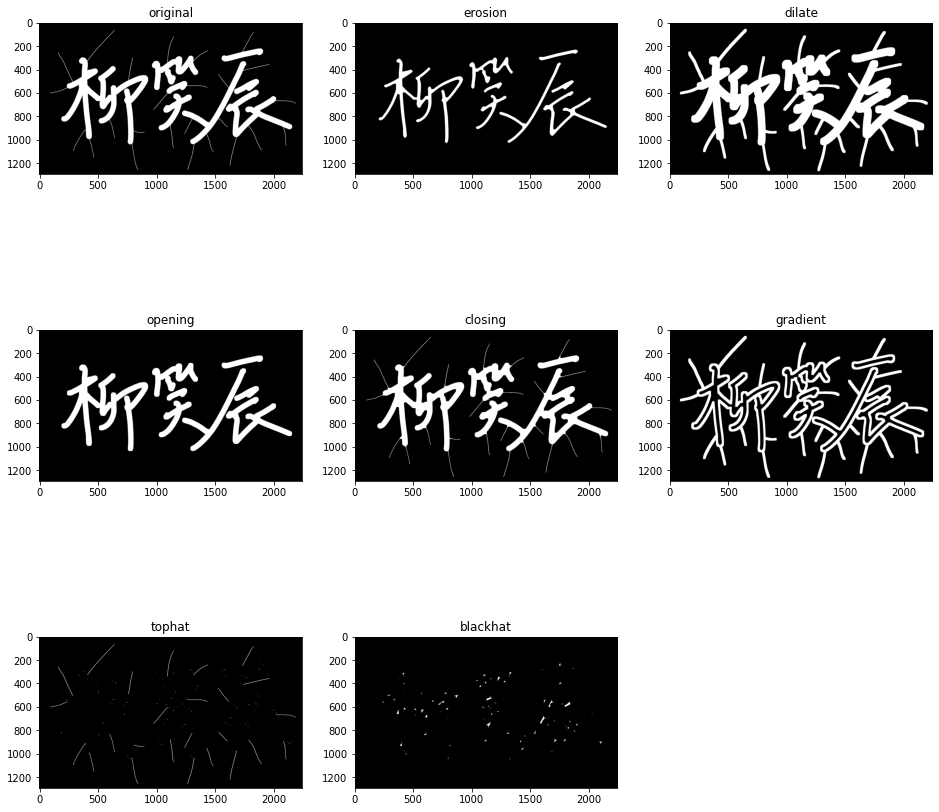

In [16]:
img = cv2.imread('lxc_write.jpeg',0)
ret,img_binary = cv2.threshold(img,127,255,cv2.THRESH_BINARY)       #二值化
kernel = np.ones((19,19),np.uint8)
#腐蚀操作
erosion = cv2.erode(img_binary,kernel,iterations = 1)
#膨胀操作
dilate = cv2.dilate(img_binary,kernel,iterations = 1)
#开运算
opening = cv2.morphologyEx(img_binary,cv2.MORPH_OPEN,kernel)
#闭运算
closing = cv2.morphologyEx(img_binary,cv2.MORPH_CLOSE,kernel)
#梯度
gradient = cv2.morphologyEx(img_binary,cv2.MORPH_GRADIENT,kernel)
#礼帽
tophat = cv2.morphologyEx(img_binary,cv2.MORPH_TOPHAT,kernel)
#黑帽
blackhat = cv2.morphologyEx(img_binary,cv2.MORPH_BLACKHAT,kernel)


imgs = [img,erosion,dilate,opening,closing,gradient,tophat,blackhat]
titles = ['original','erosion','dilate','opening','closing','gradient','tophat','blackhat']
showList(imgs,titles)

# Sobel算子
```
dst = cv2.Sobel(src,dst,depth,dx,dy,ksize)
```
- dst : 输出图像
- depth : 图像的深度
- dx 和 dy 表示水平和竖直方向 0或1
- ksize 是Sobel算子的大小

# 同理 Scharr算子 和 Laplacian算子
scharr:
```
dst = cv2.Scharr(src,dst,depth,dx,dy,scale = 1,delta = 0,intborderType = BORDER_DEFAULT)
```
- scale,delta,BORDER_DEFAULT 使用默认值

laplacian:
```
dst = cv2.Laplacian(src,dst,depth,ksize,scale = 1,delta = 0,intborderType = BORDER_DEFAULT)
```
- scale,delta,BORDER_DEFAULT 使用默认值

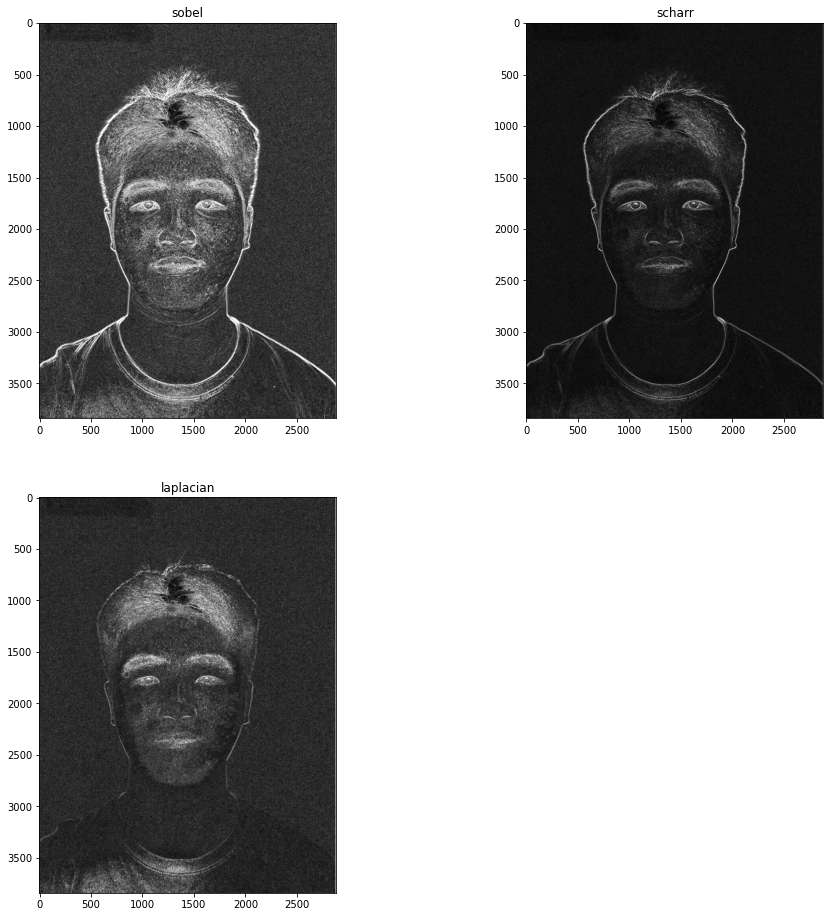

In [20]:
img = cv2.imread('lxc.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize = 5)
sobelx = cv2.convertScaleAbs(sobelx)                               #反转
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize = 5)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

scharrx = cv2.Scharr(img,cv2.CV_64F,1,0,scale = 1,delta = 0)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1,scale = 1,delta = 0)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx,0.5,scharry,0.5,0)

laplacian = cv2.Laplacian(img,cv2.CV_64F,ksize = 5)
laplacian = cv2.convertScaleAbs(laplacian)
sobels = [sobelxy,scharrxy,laplacian]
titles = ['sobel','scharr','laplacian']
showList(sobels,titles)

# Canny边缘检测算法
Canny(src,minVal,maxVal)
- 当图像的灰度梯度高于maxVal时被认为是真的边界，那些低于minVal的边界会被抛弃。如果介于两者之间的话，就要看这个点是否与某个被确定为真正边界点相连，如果是，就认为它也是边界点，如果不是就抛弃。

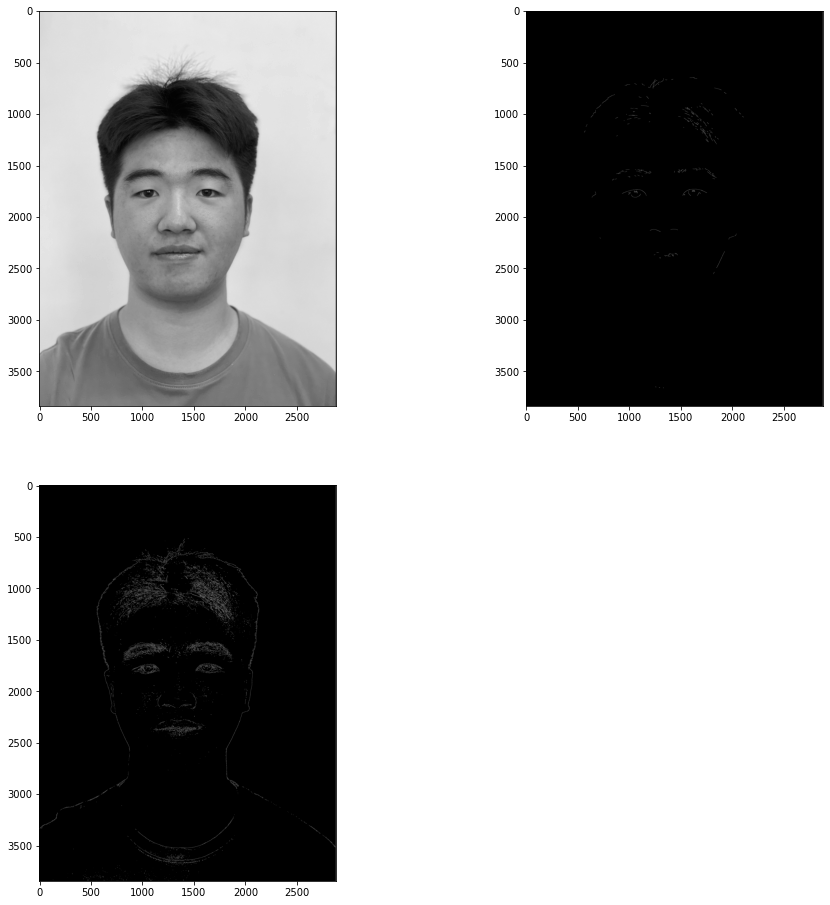

In [44]:
img = cv2.imread('lxc.jpg',cv2.IMREAD_GRAYSCALE)
canny1 = cv2.Canny(img,80,150)
canny2 = cv2.Canny(img,50,58)
showList([img,canny1,canny2],[])

# 图像金字塔
### 高斯金字塔
### 拉普拉斯金字塔


(3840, 2880, 3) (7680, 5760, 3) (1920, 1440, 3) (15360, 11520, 3) (960, 720, 3)


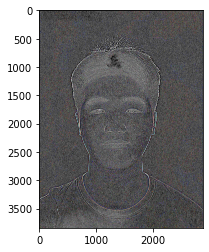

In [48]:
#高斯金字塔
img = cv2.imread('lxc.jpg')
up = cv2.pyrUp(img)                  #上采样
down = cv2.pyrDown(img)              #下采样
up_up = cv2.pyrUp(up)                #上采样的上采样
down_down = cv2.pyrDown(down)        #下采样的下采样
up_down = cv2.pyrDown(up)            #会模糊
print(img.shape,up.shape,down.shape,up_up.shape,down_down.shape)

#拉普拉斯金字塔
img = cv2.imread('lxc.jpg')
down = cv2.pyrDown(img)
down_up = cv2.pyrUp(down)
res = img - down_up
show(res)

# 图像轮廓
```
cv2.findContours(img,mode,method)
```
- mode 轮廓检索模式：
    - RETR_EXTERNAL：只检索最外面的轮廓
    - RETR_LIST：检索所有的轮廓，并将其保存到一条链表中
    - RETR_CCOMP：检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界
    - RETR_TREE：检索所有的轮廓，并重构嵌套轮廓的整个层次
- method 轮廓逼近方法：
    - CHAIN_APPROX_NONE：以Freeman链码的方式输出轮廓，所有其他方法输出多边形（顶点的序列）
    - CHAIN_APPROX_SIMPLE：压缩水平的、垂直的和斜的部分，函数只保留他们的终点部分
    
```
cv2.drawContours(img,contours,-1,(0,0,255),2)
```
- -1：指的是全部的轮廓 其他值表示顺序选择轮廓
- (0,0,255)：BGR格式->red
- 2：线条厚度

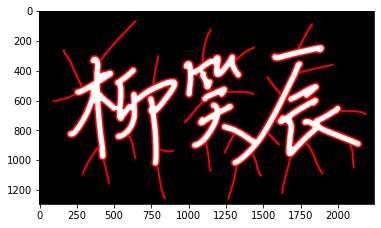

In [69]:
img = cv2.imread('lxc_write.jpeg')
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(grey,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
img_temp = img.copy()
cv2.drawContours(img_temp,contours,-1,(0,0,255),9)
show(img_temp)